<a href="https://colab.research.google.com/github/ismetkcr/kLa_prediction/blob/main/kLa_prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries for read, process and visualize raw data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# First Step
<b>We need to read data and visualize it</b>



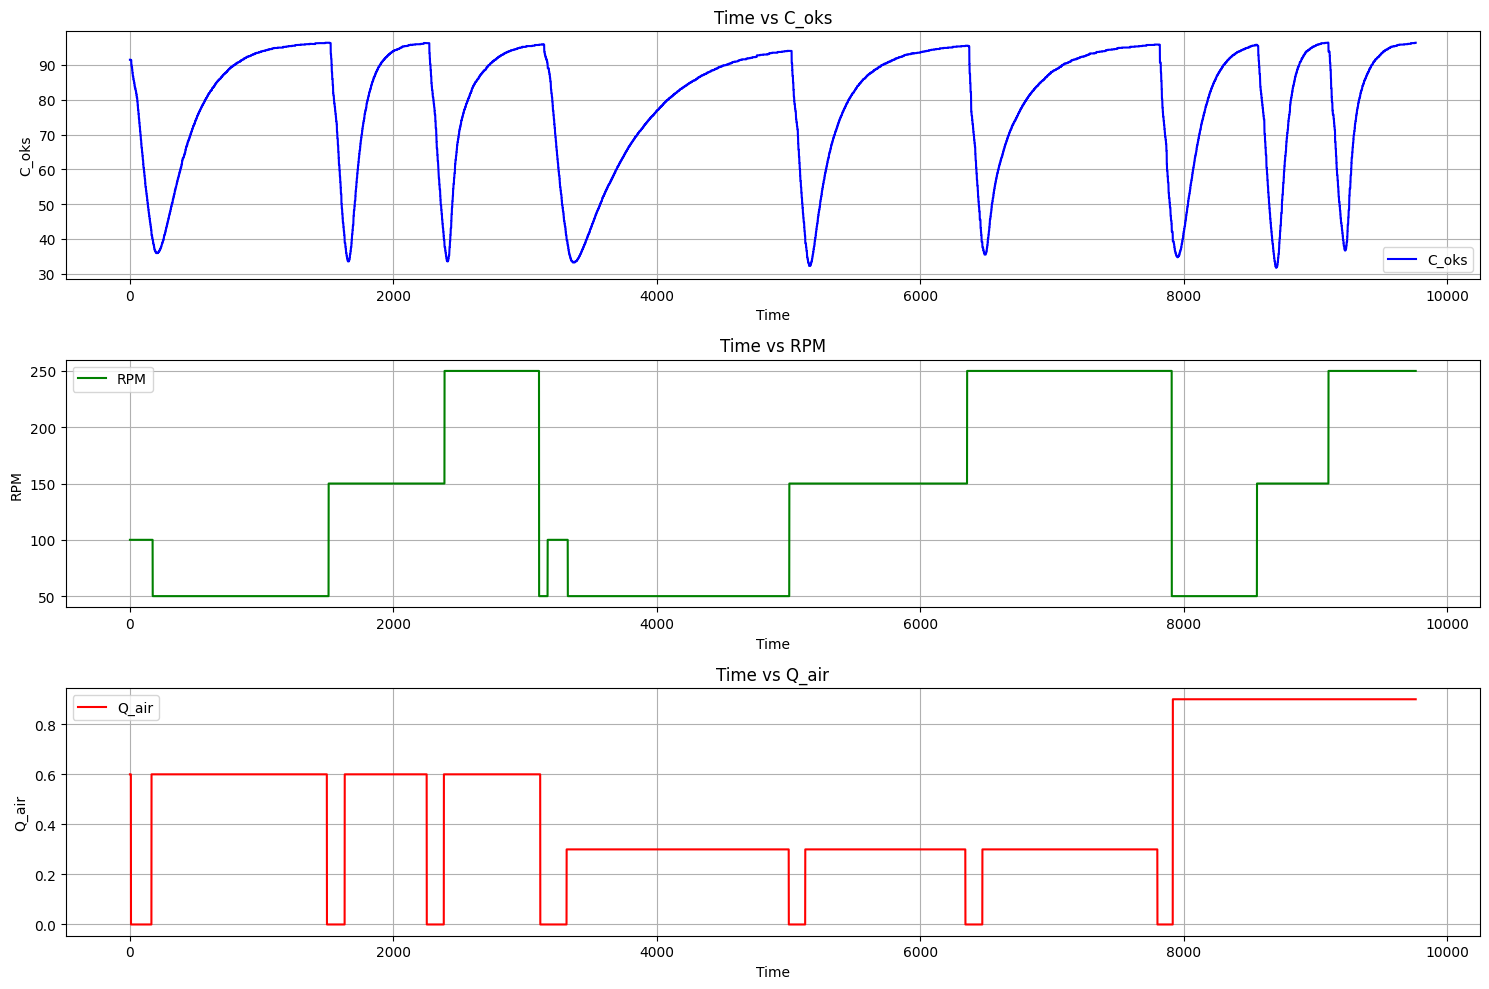

In [2]:
# Read Data
df = pd.read_excel("kla_experiment.xlsx", header=None)

# Extract columns
time = df.iloc[:, 0]
rpm = df.iloc[:, 1]
q_air = df.iloc[:, 2]
C_oks = df.iloc[:, 3]

# plot
plt.figure(figsize=(15, 10))

# time vs C_oks
plt.subplot(3, 1, 1)
plt.plot(time, C_oks, label="C_oks", color="blue")
plt.xlabel("Time")
plt.ylabel("C_oks")
plt.title("Time vs C_oks")
plt.grid(True)
plt.legend()

# time vs rpm
plt.subplot(3, 1, 2)
plt.plot(time, rpm, label="RPM", color="green")
plt.xlabel("Time")
plt.ylabel("RPM")
plt.title("Time vs RPM")
plt.grid(True)
plt.legend()

# time vs q_air
plt.subplot(3, 1, 3)
plt.plot(time, q_air, label="Q_air", color="red")
plt.xlabel("Time")
plt.ylabel("Q_air")
plt.title("Time vs Q_air")
plt.grid(True)
plt.legend()

# Grafiklerin yerleşimi ve gösterimi
plt.tight_layout()
plt.show()


# Second Step
We need to preprocess raw data to prepare data

In [3]:
#this fuction for visualize extracted data for each experiment..


def visualize_experiment(C_oks_exp, dC_oks_exp, rpm_exp, Q_exp, experiment_number, C_oks_label):
    # Extract first values of rpm and Q for plot titles
    rpm_value = rpm_exp[0]
    Q_value = Q_exp[0]

    # Create subplot
    fig, axs = plt.subplots(2, 1, figsize=(10, 7))

    # Plot C_oks (with the experiment-specific label)
    axs[0].plot(C_oks_exp, label=f'Experiment {experiment_number}')
    axs[0].set_title(f'Experiment {experiment_number}: {C_oks_label} vs Index\nRPM: {rpm_value}, Q: {Q_value}')
    axs[0].set_xlabel('Index')
    axs[0].set_ylabel(C_oks_label)  # Use C_oks_label dynamically
    axs[0].grid(True)
    axs[0].legend()

    # Plot dC_oks (shifted to match lengths)
    axs[1].plot(dC_oks_exp, label=f'Experiment {experiment_number}', color='orange')
    axs[1].set_title(f'Experiment {experiment_number}: d{C_oks_label} vs Index\nRPM: {rpm_value}, Q: {Q_value}')
    axs[1].set_xlabel('Index')
    axs[1].set_ylabel(f'd{C_oks_label}')  # Use dC_oks_label dynamically
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()



In [4]:

def calculate_kLa(C_1, C_oks_1):
    """
    Calculate volumetric mass transfer coefficient (kLa)

    Parameters:
    -----------
    C_1 : numpy.ndarray
        Filtered concentration values
    C_oks_1 : numpy.ndarray
        Original concentration values

    Returns:
    --------
    float
        Calculated kLa value
    """
    # Find maximum concentration
    C_max = np.max(C_oks_1)

    # Find indices for first and last values of C_1 in C_oks_1
    t1 = np.where(C_oks_1 == C_1[0])[0][0]
    t2 = np.where(C_oks_1 == C_1[-1])[0][0]

    # Calculate numerator and denominator for kLa formula
    numerator = C_max - C_1[0]
    denominator = C_max - C_1[-1]

    # Calculate kLa using logarithmic formula
    kLa = np.log(numerator / denominator) / (t2 - t1)

    return kLa

exp 1 kLa value : 0.0040049933872748225


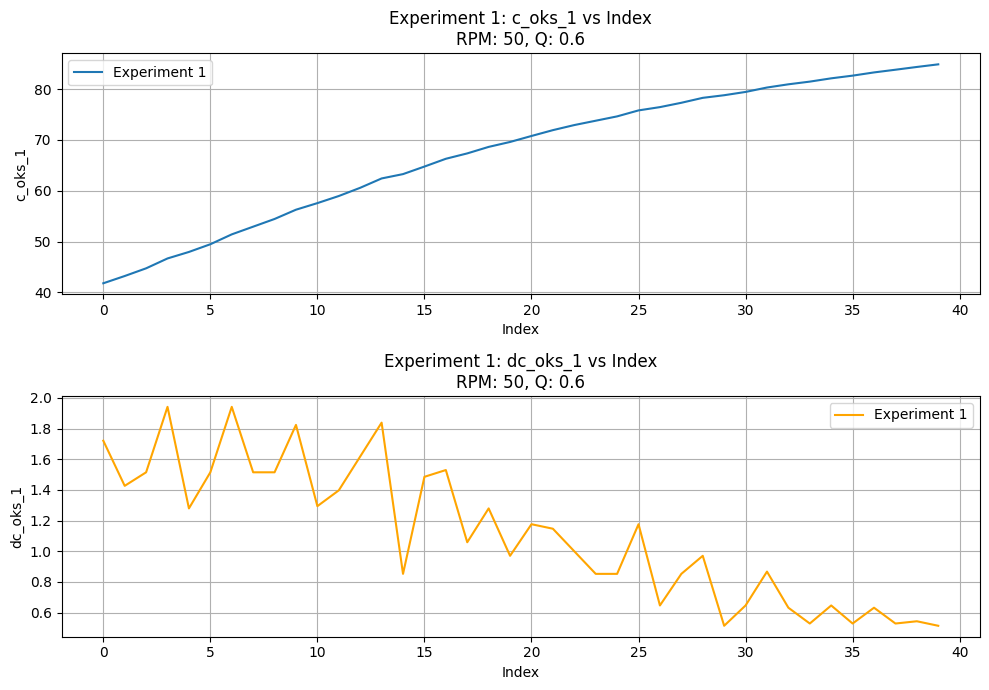

In [13]:
#Experiment 1  : Q = 0.6, RPM = 50
C_oks_1 = C_oks[257:1525]
max_C1 = np.max(C_oks_1)
# Step 2: Convert to NumPy array
C_oks_1 = C_oks_1.to_numpy()

# Step 3: Filter values between 40 and 85
C_oks_1_filt = C_oks_1[(C_oks_1 >= 40) & (C_oks_1 <= 85)]

# Initialize an empty list to store differences
dC_oks_1 = []
C_1 = []

# Loop through the array, with defined step, calculate difference between C2 and C1 store in diff, and store corresponding C2 value in C_1 array
step = 10
for i in range(0, len(C_oks_1_filt) - step, step):
    diff = C_oks_1_filt[i + step] - C_oks_1_filt[i]
    dC_oks_1.append(diff)
    C_1.append(C_oks_1_filt[i + step])  # Store the second value (Ca2) for each diff

# Convert lists to numpy arrays
dC_oks_1 = np.array(dC_oks_1)
C_1 = np.array(C_1) #array


rpm_1 = np.full(len(dC_oks_1), 50)
Q_1 = np.full(len(dC_oks_1), 0.6)
kLa_1 = calculate_kLa(C_1, C_oks_1)
kLa_1_arr = np.full(len(C_1), kLa_1 )
print("exp 1 kLa value :", kLa_1)

visualize_experiment(C_1, dC_oks_1, rpm_1, Q_1, experiment_number=1, C_oks_label = "c_oks_1")


In [6]:
C_1

array([41.80882353, 43.23529412, 44.75      , 46.69117647, 47.97058824,
       49.48529412, 51.42647059, 52.94117647, 54.45588235, 56.27941176,
       57.57352941, 58.97058824, 60.58823529, 62.42647059, 63.27941176,
       64.76470588, 66.29411765, 67.35294118, 68.63235294, 69.60294118,
       70.77941176, 71.92647059, 72.92647059, 73.77941176, 74.63235294,
       75.80882353, 76.45588235, 77.30882353, 78.27941176, 78.79411765,
       79.44117647, 80.30882353, 80.94117647, 81.47058824, 82.11764706,
       82.64705882, 83.27941176, 83.80882353, 84.35294118, 84.86764706])

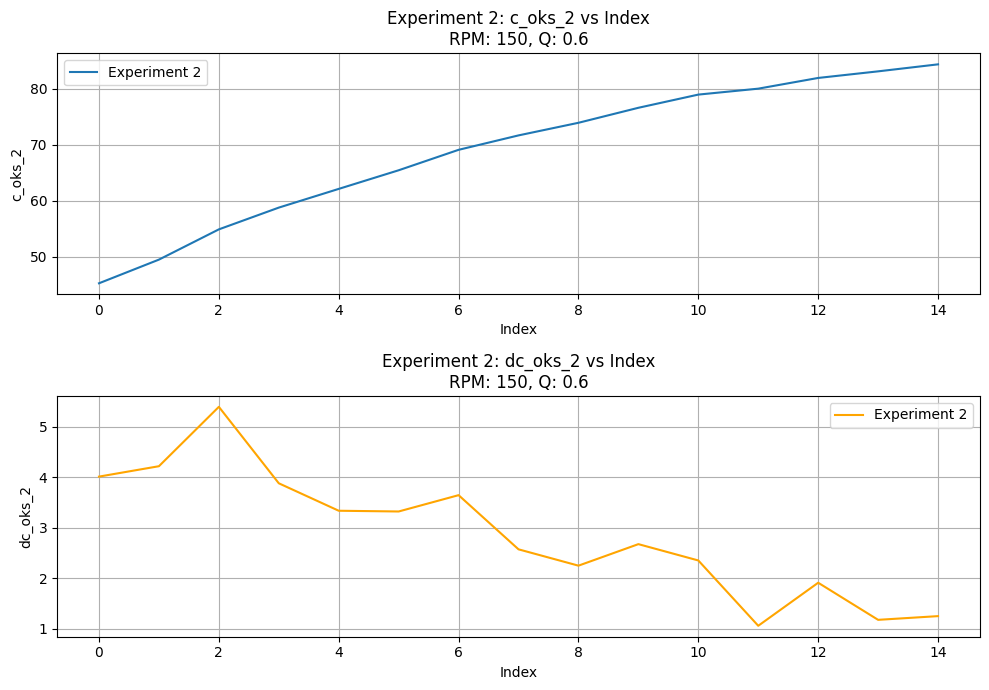

exp 2 kLa value : 0.01038373016149333


In [14]:
#Experiment 2 : Q = 0.6, RPM = 150
C_oks_2 = C_oks[1687:2254]
C_oks_2 = C_oks_2.to_numpy()
max_C2 = np.max(C_oks_2)

C_oks_2_filt = C_oks_2[(C_oks_2 >= 40) & (C_oks_2 <= 85)]

# Initialize an empty list to store differences
dC_oks_2 = []
C_2 = []
# Loop through the array, stepping
step = 10
for i in range(0, len(C_oks_2_filt) - step, step):
    diff = C_oks_2_filt[i + step] - C_oks_2_filt[i]
    dC_oks_2.append(diff)
    C_2.append(C_oks_2_filt[i + step])  # Store the second value (Ca2) for each diff


dC_oks_2 = np.array(dC_oks_2)
C_2 = np.array(C_2)
rpm_2 = np.full(len(dC_oks_2), 150)
Q_2 = np.full(len(dC_oks_2), 0.6)
visualize_experiment(C_2, dC_oks_2, rpm_2, Q_2, experiment_number=2, C_oks_label = "c_oks_2")
kLa_2 = calculate_kLa(C_2, C_oks_2)
kLa_2_arr = np.full(len(C_2), kLa_2)
print("exp 2 kLa value :", kLa_2)



In [8]:
C_2

array([45.30882353, 49.52941176, 54.92647059, 58.80882353, 62.14705882,
       65.47058824, 69.11764706, 71.69117647, 73.94117647, 76.61764706,
       78.97058824, 80.02941176, 81.94117647, 83.11764706, 84.36764706])

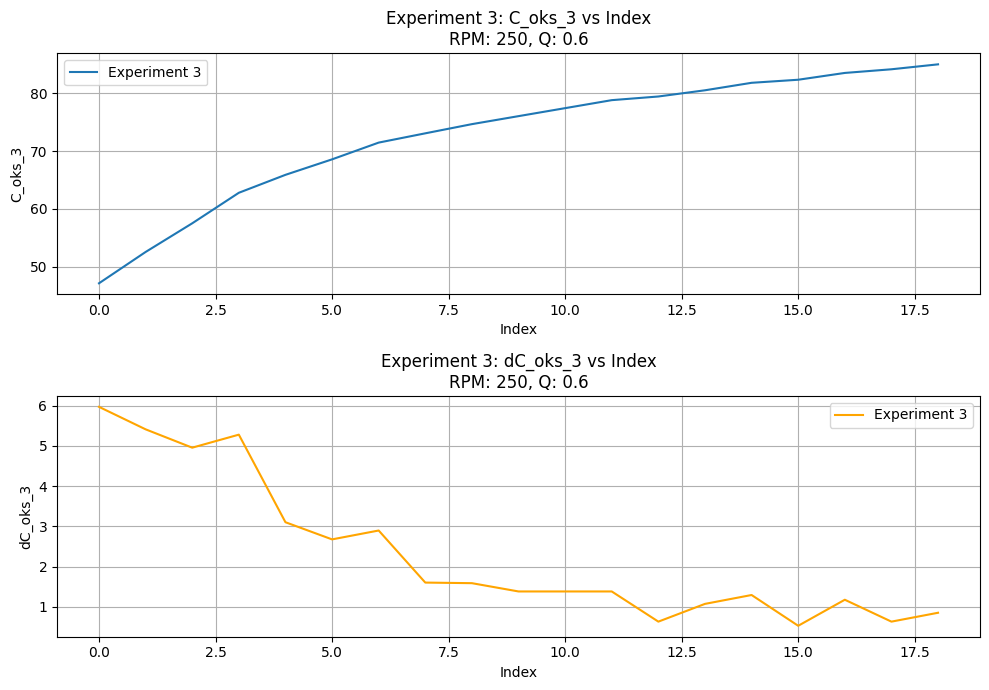

exp 3 kLa value 0.008271631343026544


In [15]:
#Experiment 3 : Q = 0.6, RPM = 250
C_oks_3 = C_oks[2433:3130]
C_oks_3 = C_oks_3.to_numpy()
C_oks_3_filt = C_oks_3[(C_oks_3 >= 40) & (C_oks_3 <= 85)]

# Initialize an empty list to store differences
dC_oks_3 = []
C_3 = []
# Loop throgh the array, stepping
step = 10
for i in range(0, len(C_oks_3_filt) - step, step):
    diff = C_oks_3_filt[i + step] - C_oks_3_filt[i]
    dC_oks_3.append(diff)
    C_3.append(C_oks_3_filt[i + step])  # Store the second value (Ca2) for each diff


dC_oks_3 = np.array(dC_oks_3)
C_3 = np.array(C_3)
rpm_3 = np.full(len(dC_oks_3), 250)
Q_3 = np.full(len(dC_oks_3), 0.6)
visualize_experiment(C_3, dC_oks_3, rpm_3, Q_3, experiment_number=3, C_oks_label = "C_oks_3")
kLa_3 = calculate_kLa(C_3, C_oks_3)
kLa_3_arr = np.full(len(C_3), kLa_3)

print("exp 3 kLa value", kLa_3)




In [10]:
C_3

array([47.14705882, 52.55882353, 57.51470588, 62.79411765, 65.89705882,
       68.57352941, 71.47058824, 73.07352941, 74.66176471, 76.04411765,
       77.42647059, 78.80882353, 79.44117647, 80.51470588, 81.80882353,
       82.33823529, 83.51470588, 84.14705882, 85.        ])

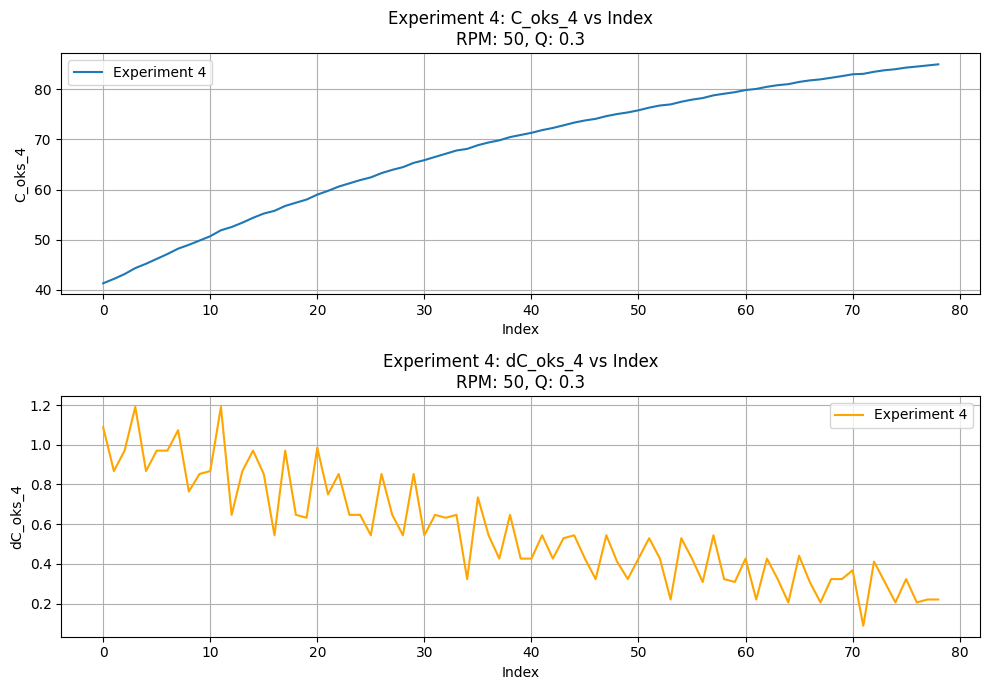

exp 4 kla value 0.002268735924659561


In [16]:
# Experiment - 4 Q = 0.3, RPM = 50
C_oks_4 = C_oks[3470:5025]
C_oks_4 = C_oks_4.to_numpy()
max_C4 = np.max(C_oks_4)
C_oks_4_filt = C_oks_4[(C_oks_4 >= 40) & (C_oks_4 <= 85)]

# Initialize an empty list to store differences
dC_oks_4 = []
C_4 = []
# Loop through the array, stepping
step = 10
for i in range(0, len(C_oks_4_filt) - step, step):
    diff = C_oks_4_filt[i + step] - C_oks_4_filt[i]
    dC_oks_4.append(diff)
    C_4.append(C_oks_4_filt[i + step])  # Store the second value (Ca2) for each diff


dC_oks_4 = np.array(dC_oks_4)
C_4 = np.array(C_4)

rpm_4 = np.full(len(dC_oks_4), 50)
Q_4 = np.full(len(dC_oks_4), 0.3)
visualize_experiment(C_4, dC_oks_4, rpm_4, Q_4, experiment_number=4, C_oks_label = "C_oks_4")
kLa_4 = calculate_kLa(C_4,C_oks_4)
kLa_4_arr = np.full(len(C_4), kLa_4)

print("exp 4 kla value" ,kLa_4)



(1161,) (34,) (34,) (34,) (34,)


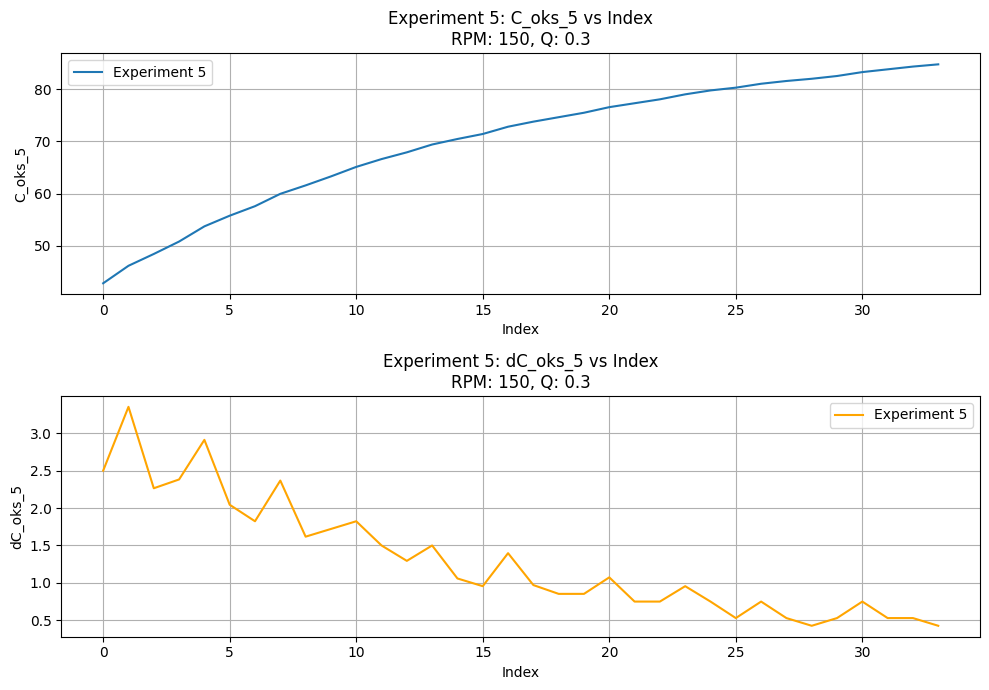

exp 5 kLa value : 0.004810519593040172


In [17]:
# Experiment 5 Q = 0.3, RPM = 150
C_oks_5 = C_oks[5204:6365]
C_oks_5 = C_oks_5.to_numpy()
C_oks_5_filt = C_oks_5[(C_oks_5 >= 40) & (C_oks_5 <= 85)]
max_C5 = np.max(C_oks_5)
# Initialize an empty list to store differences
dC_oks_5 = []
C_5 = []
# Loop through the array, stepping
step = 10
for i in range(0, len(C_oks_5_filt) - step, step):
    diff = C_oks_5_filt[i + step] - C_oks_5_filt[i]
    dC_oks_5.append(diff)
    C_5.append(C_oks_5_filt[i + step])  # Store the second value (Ca2) for each diff


dC_oks_5 = np.array(dC_oks_5)
C_5 = np.array(C_5)

rpm_5 = np.full(len(dC_oks_5), 150)
Q_5 = np.full(len(dC_oks_5), 0.3)
print(C_oks_5.shape, C_5.shape, dC_oks_5.shape, rpm_5.shape, Q_5.shape)
visualize_experiment(C_5, dC_oks_5, rpm_5, Q_5, experiment_number=5, C_oks_label = "C_oks_5")
kLa_5 = calculate_kLa(C_5,C_oks_5)
kLa_5_arr = np.full(len(C_5), kLa_5)
print("exp 5 kLa value :", kLa_5)



(1291,) (40,) (40,) (40,) (40,)


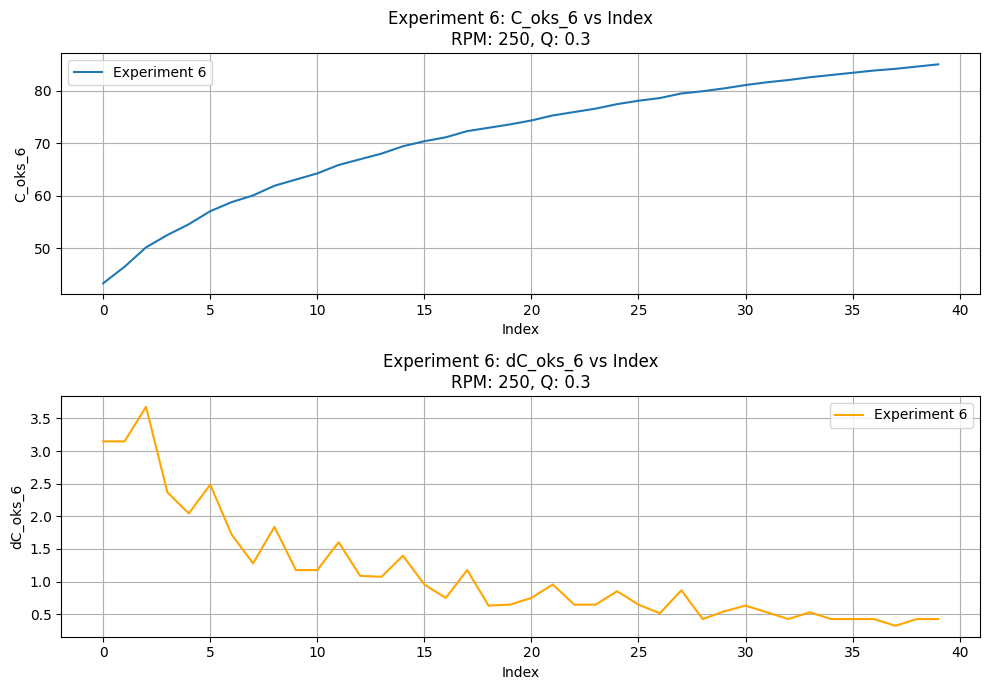

exp 6 kLa value : 0.004035122717607027


In [18]:
# Experiment 6 Q = 0.3, RPM = 250
C_oks_6 = C_oks[6516:7807]
C_oks_6 = C_oks_6.to_numpy()
max_C6 = np.max(C_oks_6)
C_oks_6_filt = C_oks_6[(C_oks_6 >= 40) & (C_oks_6 <= 85)]

# Initialize an empty list to store differences
dC_oks_6 = []
C_6 = []
# Loop through the array, stepping
step = 10
for i in range(0, len(C_oks_6_filt) - step, step):
    diff = C_oks_6_filt[i + step] - C_oks_6_filt[i]
    dC_oks_6.append(diff)
    C_6.append(C_oks_6_filt[i + step])  # Store the second value (Ca2) for each diff


dC_oks_6 = np.array(dC_oks_6)
C_6 = np.array(C_6)
rpm_6 = np.full(len(dC_oks_6), 250)
Q_6 = np.full(len(dC_oks_6), 0.3)
print(C_oks_6.shape, C_6.shape, dC_oks_6.shape, rpm_6.shape, Q_6.shape)
visualize_experiment(C_6, dC_oks_6, rpm_6, Q_6, experiment_number=6, C_oks_label = "C_oks_6")
kLa_6 = calculate_kLa(C_6, C_oks_6)
kLa_6_arr = np.full(len(C_6), kLa_6)

print("exp 6 kLa value :", kLa_6)


(556,) (23,) (23,) (23,) (23,)


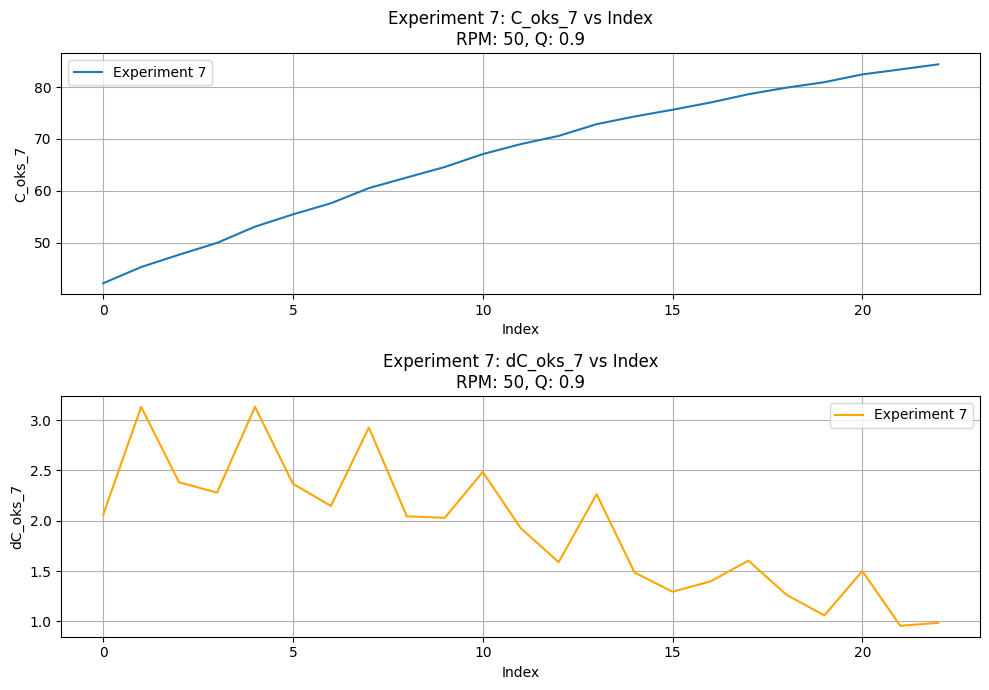

exp 7 kLa value : 0.006960211185730871


In [19]:
# Experiment 7 Q =0.9, RPM = 50
C_oks_7 = C_oks[7994:8550]
C_oks_7 = C_oks_7.to_numpy()
C_oks_7_filt = C_oks_7[(C_oks_7 >= 40) & (C_oks_7 <= 85)]

# Initialize an empty list to store differences
dC_oks_7 = []
C_7 = []
# Loop through the array, stepping
step = 10
for i in range(0, len(C_oks_7_filt) - step, step):
    diff = C_oks_7_filt[i + step] - C_oks_7_filt[i]
    dC_oks_7.append(diff)
    C_7.append(C_oks_7_filt[i + step])  # Store the second value (Ca2) for each diff


dC_oks_7 = np.array(dC_oks_7)
C_7 = np.array(C_7)

rpm_7 = np.full(len(dC_oks_7), 50)
Q_7 = np.full(len(dC_oks_7), 0.9)
print(C_oks_7.shape,C_7.shape, dC_oks_7.shape, rpm_7.shape, Q_7.shape)
visualize_experiment(C_7, dC_oks_7, rpm_7, Q_7, experiment_number=7, C_oks_label = "C_oks_7")
kLa_7 = calculate_kLa(C_7, C_oks_7)
kLa_7_arr = np.full(len(C_7), kLa_7)
print("exp 7 kLa value :", kLa_7)



(369,) (11,) (11,) (11,) (11,)


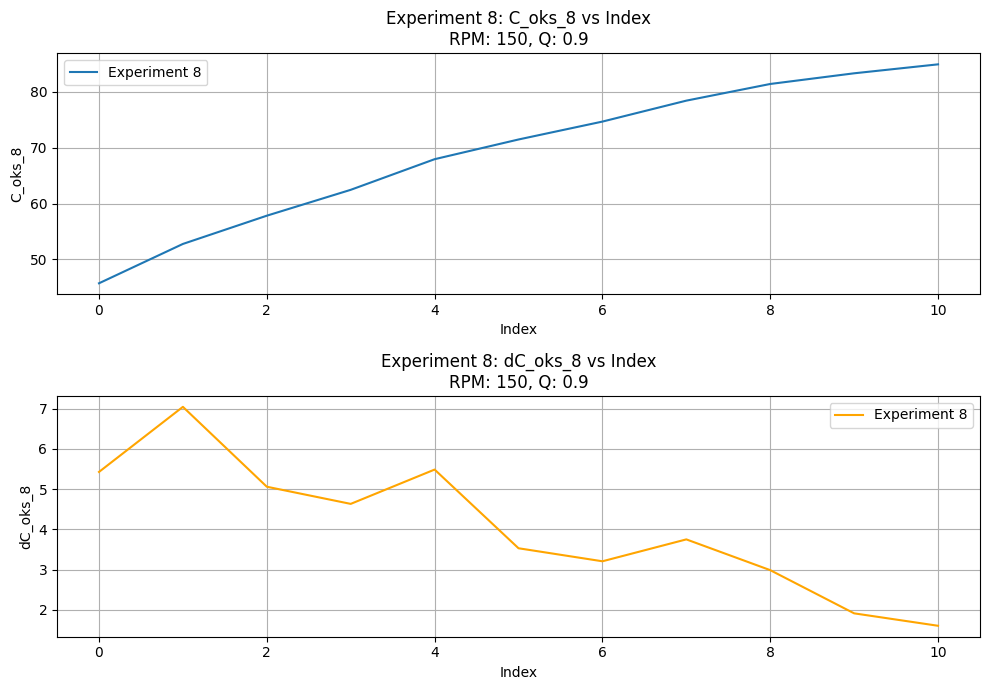

exp 8 kLa value : 0.015016849874515263


In [20]:
# Experiment 8 Q = 0.9 RPM = 150
C_oks_8 = C_oks[8731:9100]
C_oks_8 = C_oks_8.to_numpy()
C_oks_8_filt = C_oks_8[(C_oks_8 >= 40) & (C_oks_8 <=85)]

# Initialize an empty list to store differences
dC_oks_8 = []
C_8 = []
# Loop through the array, stepping
step = 10
for i in range(0, len(C_oks_8_filt) - step, step):
    diff = C_oks_8_filt[i + step] - C_oks_8_filt[i]
    dC_oks_8.append(diff)
    C_8.append(C_oks_8_filt[i + step])  # Store the second value (Ca2) for each diff


dC_oks_8 = np.array(dC_oks_8)
C_8 = np.array(C_8)
rpm_8 = np.full(len(dC_oks_8), 150)
Q_8 = np.full(len(dC_oks_8), 0.9)
print(C_oks_8.shape,C_8.shape, dC_oks_8.shape, rpm_8.shape, Q_8.shape)
visualize_experiment(C_8, dC_oks_8, rpm_8, Q_8, experiment_number=8, C_oks_label = "C_oks_8")
kLa_8 = calculate_kLa(C_8, C_oks_8)
kLa_8_arr = np.full(len(C_8), kLa_8)

print("exp 8 kLa value :", kLa_8)


(520,) (12,) (12,) (12,) (12,)


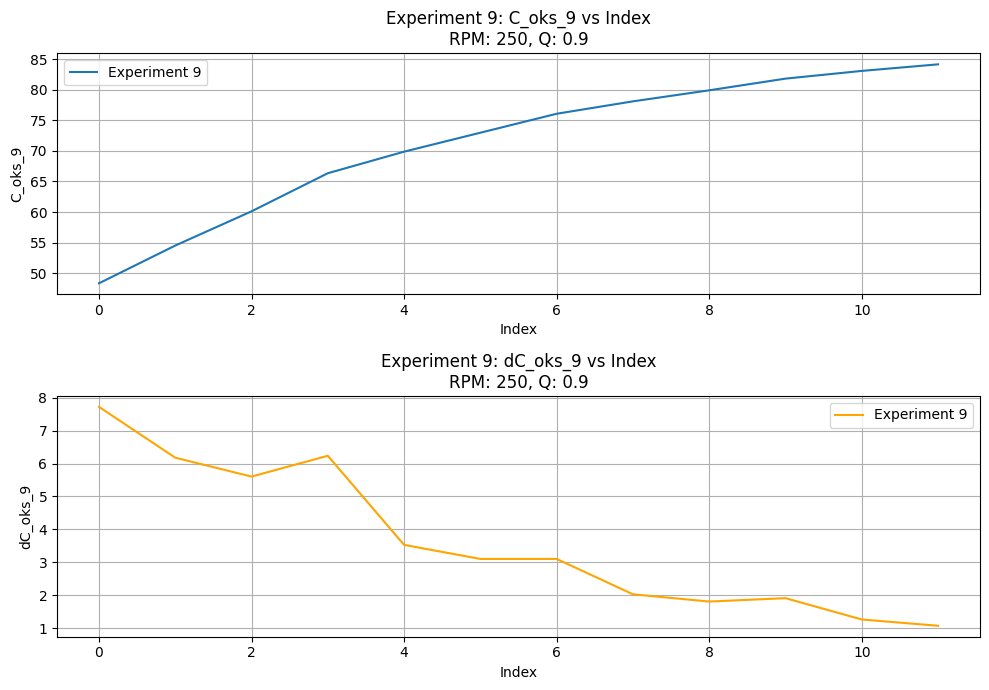

exp 9 kLa value : 0.012703721178937703


In [21]:
# Experiment 9 Q = 0.9, RPM = 250
C_oks_9 = C_oks[9244:9764]
C_oks_9 = C_oks_9.to_numpy()
C_oks_9_filt = C_oks_9[(C_oks_9 >= 40) & (C_oks_9 <= 85)]

# Initialize an empty list to store differences
dC_oks_9 = []
C_9 = []
# Loop through the array, stepping
step = 10
for i in range(0, len(C_oks_9_filt) - step, step):
    diff = C_oks_9_filt[i + step] - C_oks_9_filt[i]
    dC_oks_9.append(diff)
    C_9.append(C_oks_9_filt[i + step])  # Store the second value (Ca2) for each diff


dC_oks_9 = np.array(dC_oks_9)
C_9 = np.array(C_9)

rpm_9 = np.full(len(dC_oks_9), 250)
Q_9 = np.full(len(dC_oks_9), 0.9)
print(C_oks_9.shape, C_9.shape, dC_oks_9.shape, rpm_9.shape, Q_9.shape)
visualize_experiment(C_9, dC_oks_9, rpm_9, Q_9, experiment_number=9, C_oks_label = "C_oks_9")
kLa_9 = calculate_kLa(C_9, C_oks_9)
kLa_9_arr = np.full(len(C_9), kLa_9)

print("exp 9 kLa value :", kLa_9)


Hesaplanan kLa değerleri ile alakalı : Tüm Q değerleri için  150rpm kLa değerleri 250 rpm kLA değerlerinden fazla.


# Third Step
# find max and min values for normalize data

In [22]:
# Example placeholder for arrays
C_arrays = [C_1, C_2, C_3, C_4, C_5, C_6, C_7, C_8, C_9]
dC_oks_arrays = [dC_oks_1, dC_oks_2, dC_oks_3, dC_oks_4, dC_oks_5,
                 dC_oks_6, dC_oks_7, dC_oks_8, dC_oks_9]
rpm_arrays = [rpm_1, rpm_2, rpm_3, rpm_4, rpm_5, rpm_6, rpm_7, rpm_8, rpm_9]
Q_arrays = [Q_1, Q_2, Q_3, Q_4, Q_5, Q_6, Q_7, Q_8, Q_9]

# Store max values in dictionaries for better organization
max_values = {
    "C_max": [],
    "dC_oks_max": [],
    "rpm_max": [],
    "Q_max": []
}

# Compute max values
for C, dC_oks, rpm, Q in zip(C_arrays, dC_oks_arrays, rpm_arrays, Q_arrays):
    max_values["C_max"].append(np.max(C))
    max_values["dC_oks_max"].append(np.max(dC_oks))
    max_values["rpm_max"].append(np.max(rpm))
    max_values["Q_max"].append(np.max(Q))

# Display results
for key, values in max_values.items():
    print(f"{key}: {values}")

# Compute the overall maximum values
overall_C_max = np.max(max_values["C_max"])
overall_dC_oks_max = np.max(max_values["dC_oks_max"])
overall_rpm_max = np.max(max_values["rpm_max"])
overall_Q_max = np.max(max_values["Q_max"])

# Compute the minimum values for each experiment
min_values = {
    "C_min": [],
    "dC_oks_min": [],
    "rpm_min": [],
    "Q_min": []
}

# Iterate through each array to find per-array minimum values
for C, dC_oks, rpm, Q in zip(C_arrays, dC_oks_arrays, rpm_arrays, Q_arrays):
    min_values["C_min"].append(np.min(C))
    min_values["dC_oks_min"].append(np.min(dC_oks))
    min_values["rpm_min"].append(np.min(rpm))
    min_values["Q_min"].append(np.min(Q))

# Compute the overall minimum values
overall_C_min = np.min(min_values["C_min"])
overall_dC_oks_min = np.min(min_values["dC_oks_min"])
overall_rpm_min = np.min(min_values["rpm_min"])
overall_Q_min = np.min(min_values["Q_min"])

# Print results for verification
print(f"C_min values: {min_values['C_min']}")
print(f"Overall C_min: {overall_C_min}")
print(f"dC_oks_min values: {min_values['dC_oks_min']}")
print(f"Overall dC_oks_min: {overall_dC_oks_min}")
print(f"rpm_min values: {min_values['rpm_min']}")
print(f"Overall rpm_min: {overall_rpm_min}")
print(f"Q_min values: {min_values['Q_min']}")
print(f"Overall Q_min: {overall_Q_min}")

C_max: [84.86764705882354, 84.36764705882352, 84.99999999999999, 84.99999999999999, 84.77941176470588, 84.99999999999999, 84.39705882352942, 84.94117647058823, 84.17647058823529]
dC_oks_max: [1.9411764705882462, 5.397058823529413, 5.970588235294109, 1.1911764705882462, 3.352941176470587, 3.67647058823529, 3.132352941176471, 7.044117647058826, 7.720588235294123]
rpm_max: [50, 150, 250, 50, 150, 250, 50, 150, 250]
Q_max: [0.6, 0.6, 0.6, 0.3, 0.3, 0.3, 0.9, 0.9, 0.9]
C_min values: [41.80882352941177, 45.30882352941176, 47.147058823529406, 41.27941176470588, 42.80882352941176, 43.33823529411764, 42.14705882352941, 45.73529411764705, 48.33823529411765]
Overall C_min: 41.27941176470588
dC_oks_min values: [0.514705882352942, 1.0588235294117823, 0.5294117647058698, 0.08823529411765207, 0.42647058823528994, 0.32352941176471006, 0.9558823529412024, 1.602941176470594, 1.07352941176471]
Overall dC_oks_min: 0.08823529411765207
rpm_min values: [50, 150, 250, 50, 150, 250, 50, 150, 250]
Overall rpm_m

In [23]:
#check values
max_C_value = overall_C_max
min_C_value = overall_C_min

max_dC_value = overall_dC_oks_max
min_dC_value = overall_dC_oks_min


In [24]:
max_C_value, min_C_value, max_dC_value, min_dC_value

(84.99999999999999, 41.27941176470588, 7.720588235294123, 0.08823529411765207)

# Step 4: Prepare X_train, y_train, X_test y_test for neural network
Its proven that in literature neural networks tend to give better result with normalized data
We will also normalize X (input of neural network) which contains
C , dC , rpm, Q and

neural network output dimension is 1, contains only kLa

(262,)


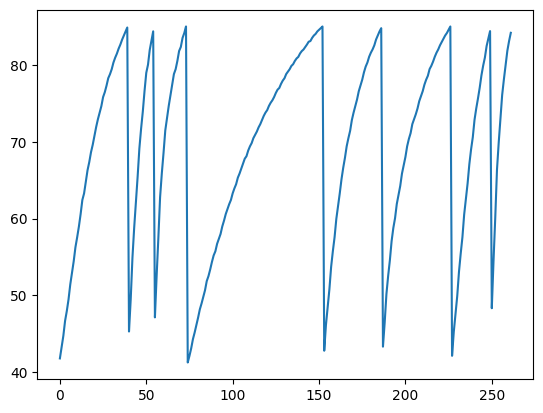

In [25]:
#first Create X_train and y_train : Experiments : 1, 2, 3, 4, 5 6, 7, 9
C_values_train =np.concatenate((C_1, C_2, C_3, C_4, C_5, C_6, C_7, C_9))
print(C_values_train.shape)
plt.plot(C_values_train)

(262,)


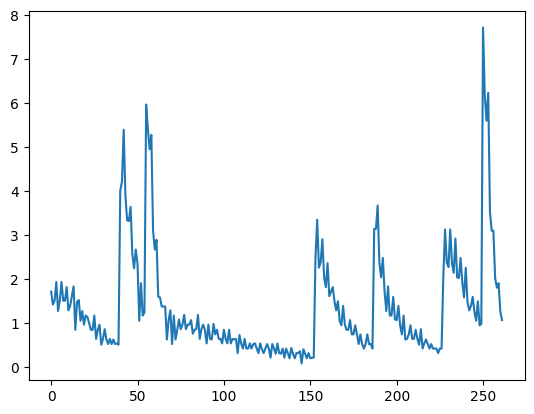

In [26]:
dC_values_train = np.concatenate((dC_oks_1, dC_oks_2, dC_oks_3, dC_oks_4, dC_oks_5, dC_oks_6, dC_oks_7, dC_oks_9))
print(dC_values_train.shape)
plt.plot(dC_values_train)

(262,)


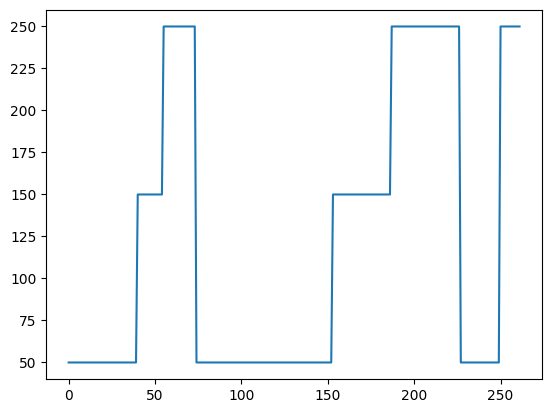

In [27]:
rpm_values_train = np.concatenate((rpm_1, rpm_2, rpm_3, rpm_4, rpm_5, rpm_6, rpm_7, rpm_9))
print(rpm_values_train.shape)
plt.plot(rpm_values_train)

(262,)


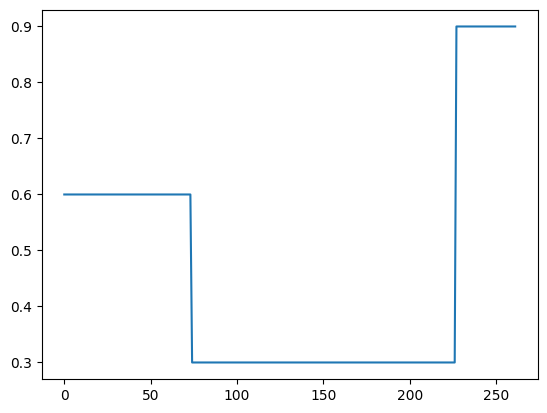

In [28]:
Q_values_train = np.concatenate((Q_1, Q_2, Q_3, Q_4, Q_5, Q_6, Q_7, Q_9))
print(Q_values_train.shape)
plt.plot(Q_values_train)


In [29]:
#stack this data and build X_train
X_train = np.stack((C_values_train, dC_values_train, rpm_values_train, Q_values_train), axis=1)
X_train.shape

(262, 4)

(262,)


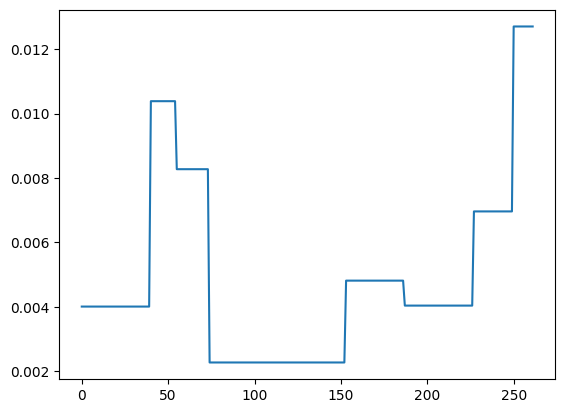

In [30]:
#kLa values for X_train using this data built y_train
y_train = np.concatenate((kLa_1_arr, kLa_2_arr, kLa_3_arr, kLa_4_arr, kLa_5_arr, kLa_6_arr, kLa_7_arr, kLa_9_arr))
print(y_train.shape)
plt.plot(y_train)

(11,)


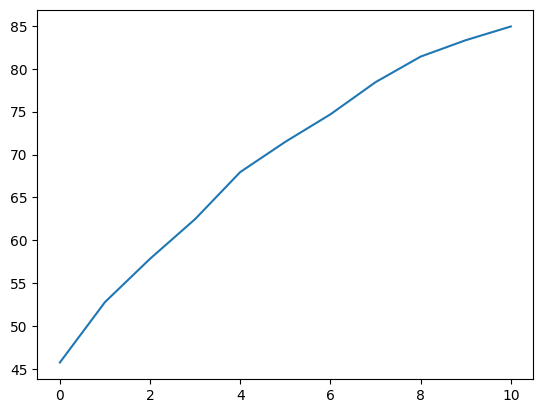

In [31]:
#prepate test data, experiment  8
C_test = C_8
print(C_test.shape)
plt.plot(C_test)

(11,)


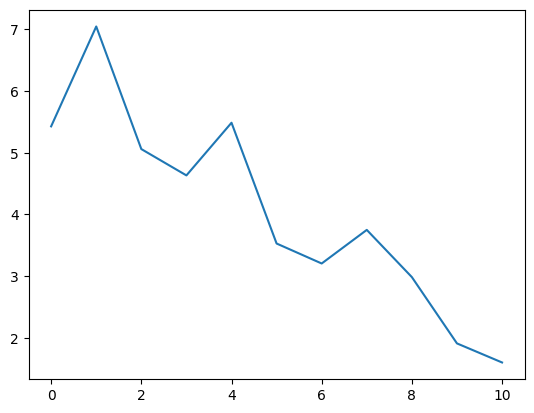

In [32]:
dC_test = dC_oks_8
print(dC_test.shape)
plt.plot(dC_test)

(11,)


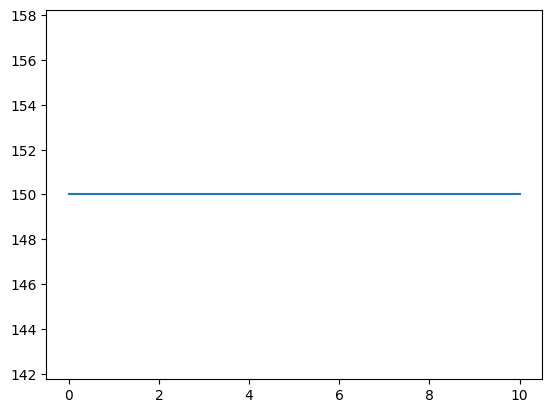

In [33]:
rpm_test = rpm_8
print(rpm_test.shape)
plt.plot(rpm_test)

(11,)


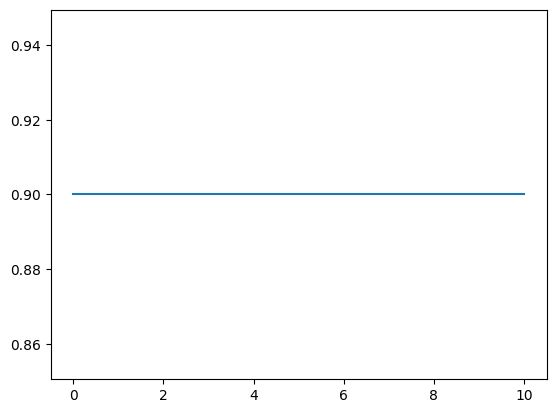

In [34]:
Q_test = Q_8
print(Q_test.shape)
plt.plot(Q_test)

In [35]:
#stack data and built X_test
X_test = np.stack((C_test, dC_test, rpm_test, Q_test), axis=1)
print(X_test.shape)


(11, 4)


(11,)


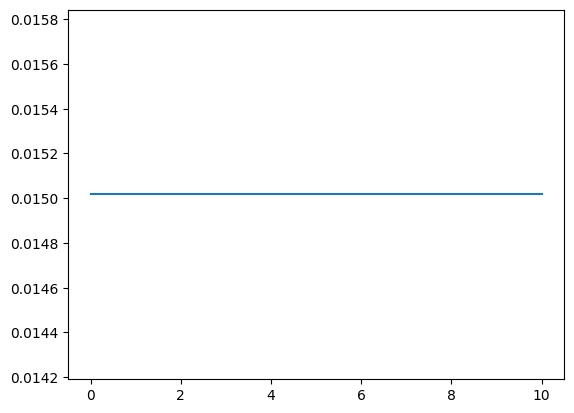

In [36]:
y_test = kLa_8_arr
print(y_test.shape)
plt.plot(y_test)

In [37]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(262, 4) (262,) (11, 4) (11,)


Normalize neural network input data

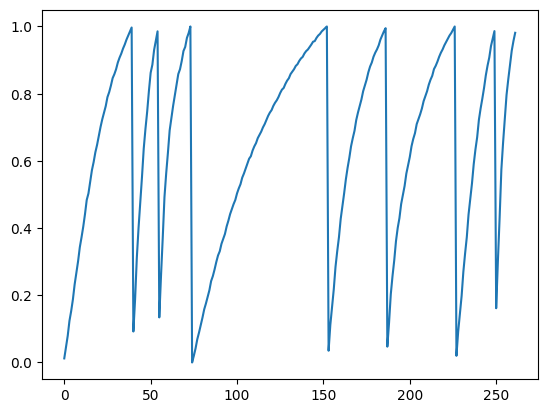

In [38]:
X_train_norm = X_train.copy()  # Create a copy to avoid modifying the original data
X_train_norm[:, 0] = (X_train[:, 0] - min_C_value) / (max_C_value - min_C_value)
plt.plot(X_train_norm[:,0])

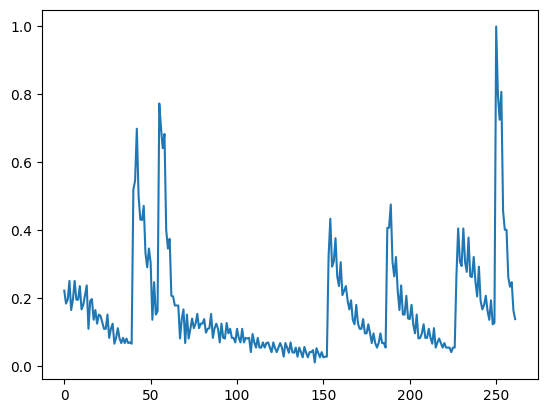

In [39]:
X_train_norm[:,1] = X_train[:, 1] / max_dC_value
plt.plot(X_train_norm[:,1])

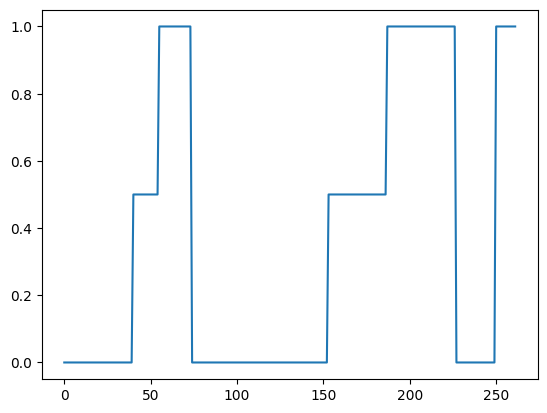

In [40]:
#normalize rpm
X_train_norm[:,2] = (X_train[:,2] - overall_rpm_min) / (overall_rpm_max - overall_rpm_min)
plt.plot(X_train_norm[:,2])

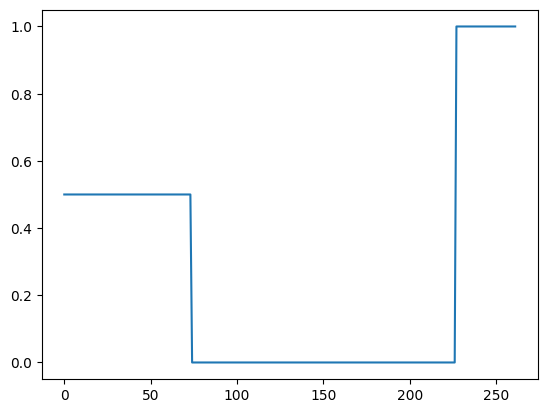

In [41]:
X_train_norm[:,3] = (X_train[:,3] - overall_Q_min) / (overall_Q_max - overall_Q_min)
plt.plot(X_train_norm[:,3])

In [42]:
X_test_norm = X_test.copy()

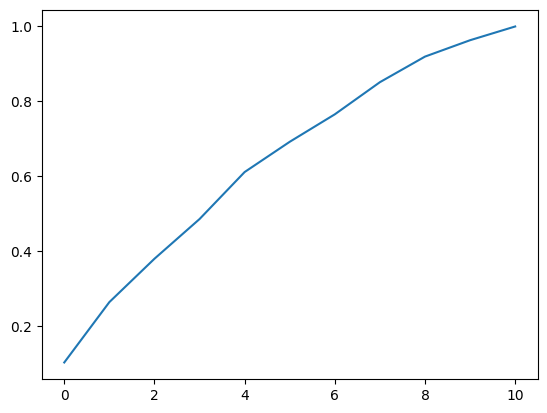

In [43]:
X_test_norm[:,0] = (X_test[:, 0] - min_C_value) / (max_C_value - min_C_value)
plt.plot(X_test_norm[:, 0])

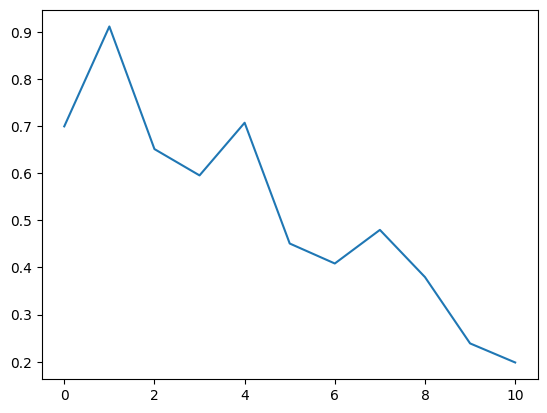

In [44]:
X_test_norm[:,1] = (X_test[:,1] - min_dC_value) / (max_dC_value - min_dC_value)
plt.plot(X_test_norm[:,1])

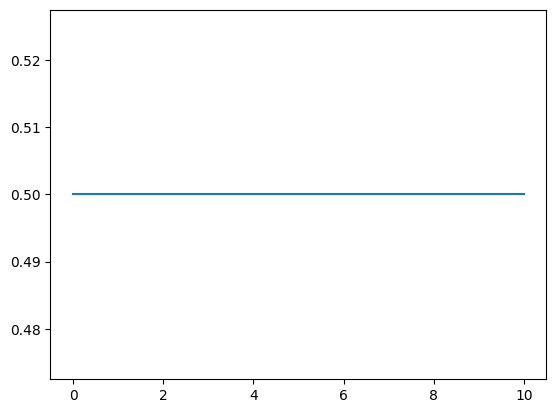

In [45]:
X_test_norm[:,2] = (X_test[:,2] - overall_rpm_min) / (overall_rpm_max - overall_rpm_min)
plt.plot(X_test_norm[:,2])

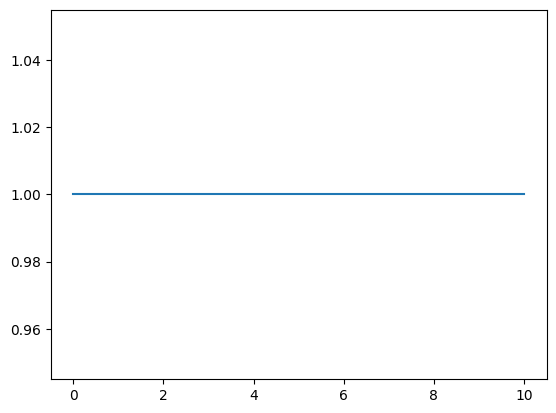

In [46]:
X_test_norm[:,3] = (X_test_norm[:,3] - overall_Q_min) / (overall_Q_max - overall_Q_min)
plt.plot(X_test_norm[:,3])

In [47]:
X_train_norm.shape, y_train.shape, X_test_norm.shape, y_test.shape

((262, 4), (262,), (11, 4), (11,))

# Step 5
Build, compile and fit  ANN Models

In [ ]:
import tensorflow as tf

In [ ]:
#Build model
model_lr = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),

    tf.keras.layers.Dense(1, activation=None)
])

#Compile model
model_lr.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

#find best learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) #traverse , start : 1e-4 increase 10**(epoch/20)
#Train model pass lr scheduler
history_lr = model_lr.fit(X_train_norm, y_train, epochs=40, validation_data=(X_test_norm, y_test), callbacks=[lr_scheduler])

Epoch 1/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 4.7416e-04 - mse: 4.7416e-04 - val_loss: 0.0010 - val_mse: 0.0010 - learning_rate: 1.0000e-04
Epoch 2/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0049e-05 - mse: 9.0049e-05 - val_loss: 1.0022e-04 - val_mse: 1.0022e-04 - learning_rate: 1.1220e-04
Epoch 3/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8549e-05 - mse: 2.8549e-05 - val_loss: 1.0016e-04 - val_mse: 1.0016e-04 - learning_rate: 1.2589e-04
Epoch 4/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.9315e-06 - mse: 7.9315e-06 - val_loss: 1.3636e-04 - val_mse: 1.3636e-04 - learning_rate: 1.4125e-04
Epoch 5/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.0266e-06 - mse: 8.0266e-06 - val_loss: 5.1942e-05 - val_mse: 5.1942e-05 - learning_rate: 1.5849e-04
Epoch 6/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.2157e-06 - mse: 2.2157e-06 - val_loss: 4.7110e-05 - val_mse: 4.7110e-05 - learning_rate: 1.7783e-04
Epoch 7/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - los

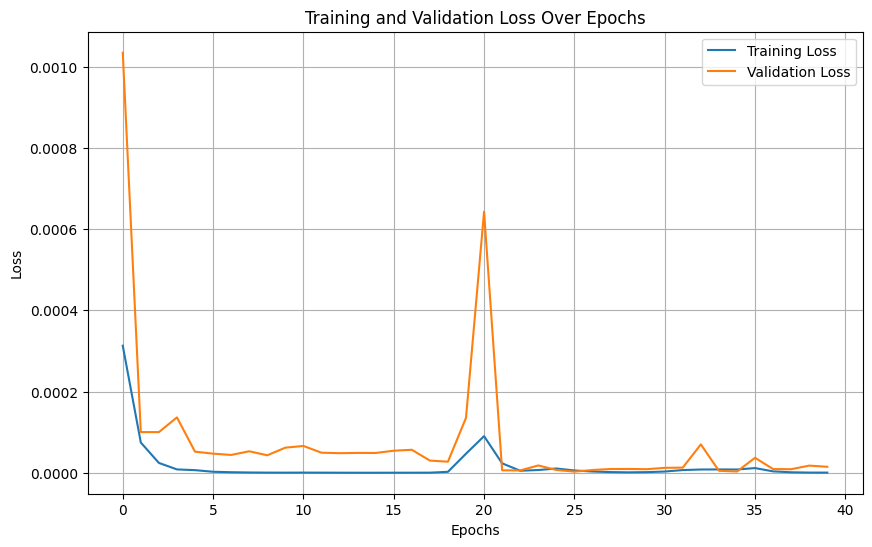

In [ ]:
# Convert the history to a DataFrame
history_df = pd.DataFrame(history_lr.history)

# Ensure learning_rate is available (if tracked separately, add it here)
# If not available in the history, you might add it manually using callbacks during training

# Plot loss and val_loss
history_df[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.grid(True)
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

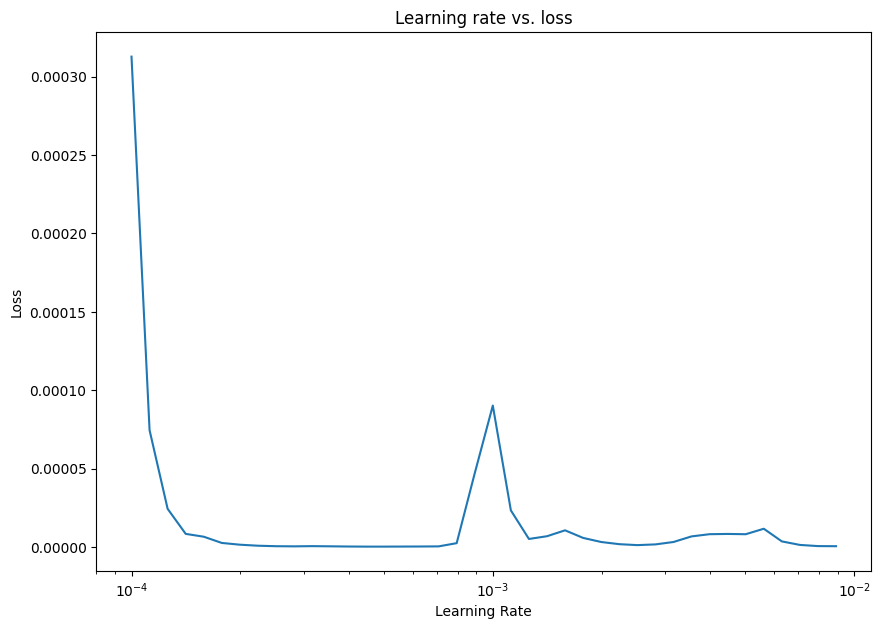

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

**Best learning rate between 10-4 and 10-3 (lr value corresponding min first point of loss curve)**

In [ ]:
#Build model with best learning rate
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),

    tf.keras.layers.Dense(1, activation=None)
])

#Compile model
model_1.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mse"])

history_1 = model_1.fit(X_train_norm, y_train, epochs=30, validation_data=(X_test_norm, y_test))

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 1.3682e-04 - val_mse: 1.3682e-04
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3021e-04 - mse: 1.3021e-04 - val_loss: 1.1972e-04 - val_mse: 1.1972e-04
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.8325e-05 - mse: 3.8325e-05 - val_loss: 1.1945e-06 - val_mse: 1.1945e-06
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5938e-05 - mse: 1.5938e-05 - val_loss: 2.8696e-05 - val_mse: 2.8696e-05
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0259e-06 - mse: 6.0259e-06 - val_loss: 2.0738e-06 - val_mse: 2.0738e-06
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8084e-06 - mse: 3.8084e-06 - val_loss: 1.7652e-05 - val_mse: 1.7652e-05
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9291e-06 - mse: 1.9291e-06 - val_loss: 7.0273e-06 - val_mse: 7.0273e-06
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4915e-06 - mse: 1.4915e-06 - val

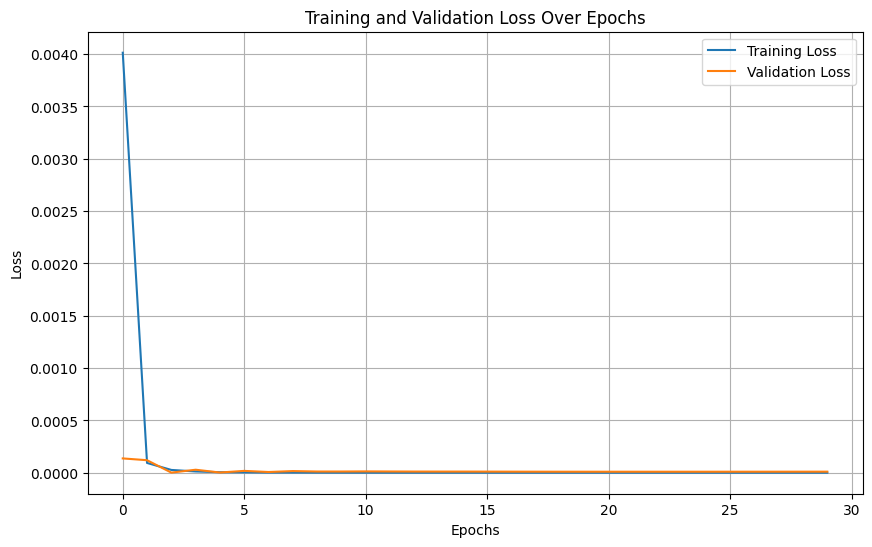

In [ ]:
# Plot loss and val_loss
history_1df = pd.DataFrame(history_1.history)
history_1df[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.grid(True)
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(262,) (262,)


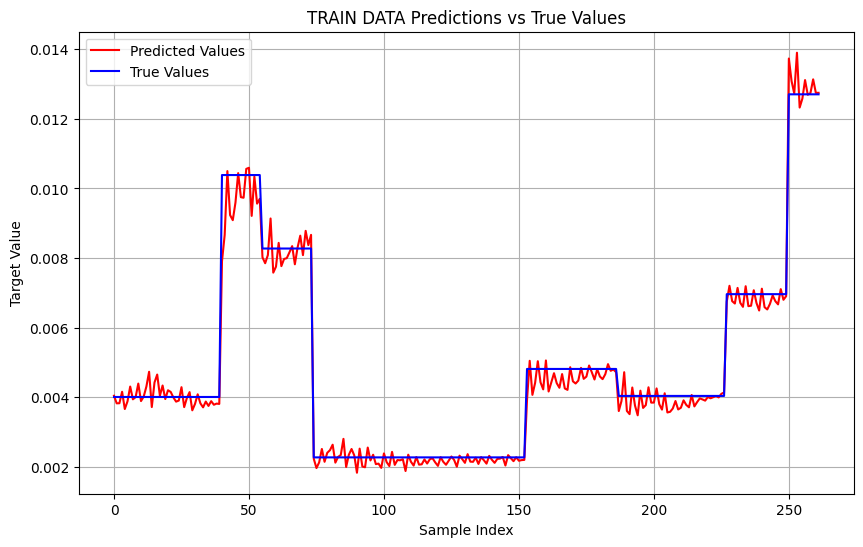

In [ ]:
y_pred_train = model_1.predict(X_train_norm).flatten()
print(y_pred_train.shape, y_train.shape)
plt.figure(figsize=(10, 6))
plt.plot(y_pred_train, label="Predicted Values", color="red")
plt.plot(y_train, label="True Values", color="blue")
plt.title("TRAIN DATA Predictions vs True Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
(11,) (11,)


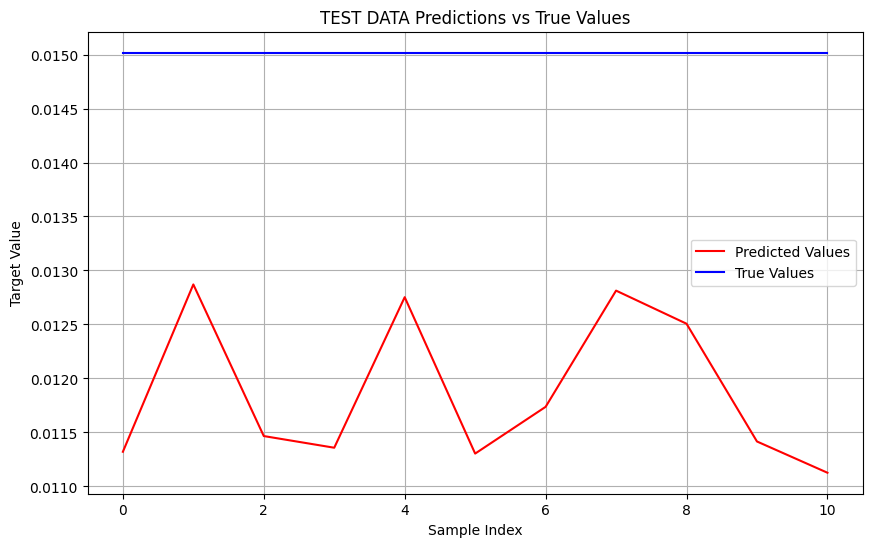

In [ ]:
y_pred_test = model_1.predict(X_test_norm).flatten()  # Flatten to match y_test shape
print(y_pred_test.shape, y_test.shape)

plt.figure(figsize=(10, 6))
plt.plot(y_pred_test, label="Predicted Values", color="red")
plt.plot(y_test, label="True Values", color="blue")
plt.title("TEST DATA Predictions vs True Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Build model with best learning rate
import random
random.seed(42)
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),

    tf.keras.layers.Dense(1, activation=None)
])

#Compile model
model_2.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mse"])

history_2 = model_2.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 2.6851e-04 - val_mse: 2.6851e-04
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8666e-05 - mse: 4.8666e-05 - val_loss: 4.3995e-05 - val_mse: 4.3995e-05
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2739e-05 - mse: 1.2739e-05 - val_loss: 2.8372e-05 - val_mse: 2.8372e-05
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.2945e-06 - mse: 5.2945e-06 - val_loss: 8.5748e-05 - val_mse: 8.5748e-05
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.4462e-06 - mse: 5.4462e-06 - val_loss: 2.7972e-05 - val_mse: 2.7972e-05
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.7506e-06 - mse: 2.7506e-06 - val_loss: 3.0152e-05 - val_mse: 3.0152e-05
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2499e-06 - mse: 1.2499e-06 - val_loss: 3.5019e-05 - val_mse: 3.5019e-05
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3726e-07 - mse: 7.3726e-07 - val

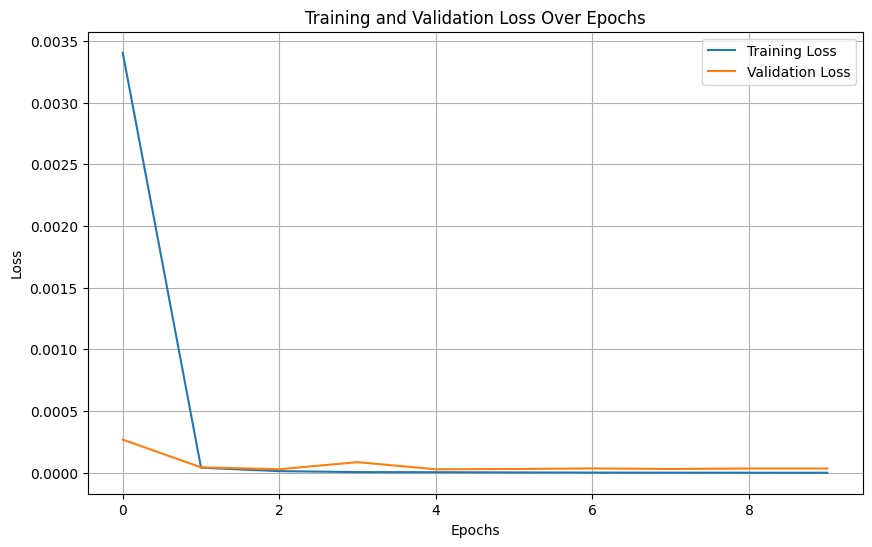

In [ ]:
# Plot loss and val_loss
history_2df = pd.DataFrame(history_2.history)
history_2df[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.grid(True)
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(262,) (262,)


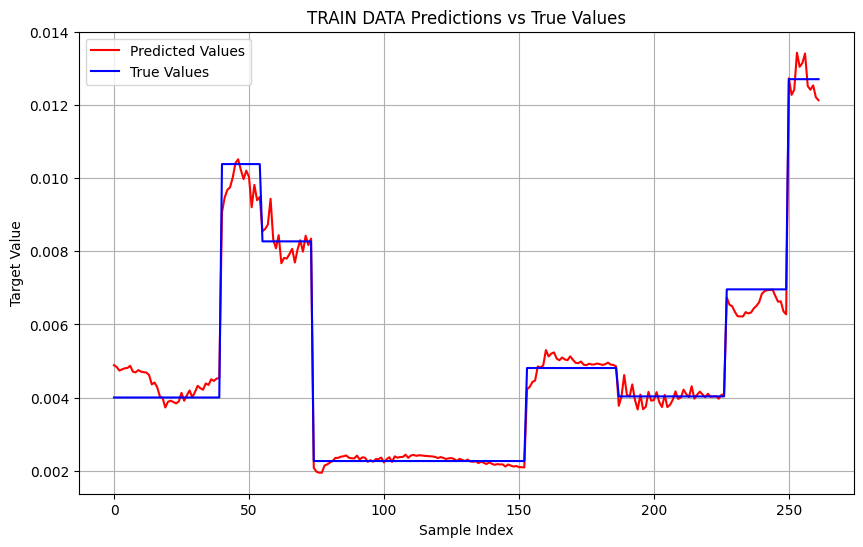

In [ ]:
y_pred_train = model_2.predict(X_train_norm).flatten()
print(y_pred_train.shape, y_train.shape)
plt.figure(figsize=(10, 6))
plt.plot(y_pred_train, label="Predicted Values", color="red")
plt.plot(y_train, label="True Values", color="blue")
plt.title("TRAIN DATA Predictions vs True Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(11,) (11,)


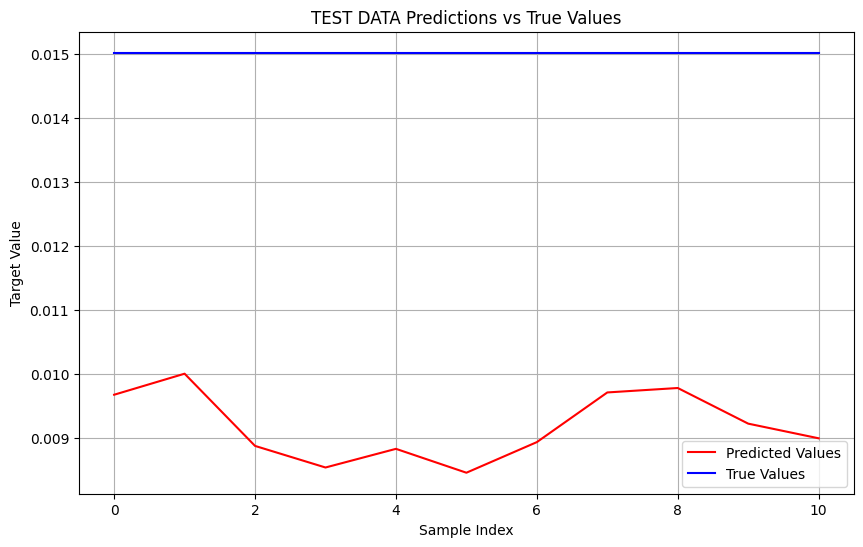

In [ ]:
y_pred_test = model_2.predict(X_test_norm).flatten()  # Flatten to match y_test shape
print(y_pred_test.shape, y_test.shape)

plt.figure(figsize=(10, 6))
plt.plot(y_pred_test, label="Predicted Values", color="red")
plt.plot(y_test, label="True Values", color="blue")
plt.title("TEST DATA Predictions vs True Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()